<a href="https://colab.research.google.com/github/lintangea/Mini-Dataset-NLP-Automatic-Grading-Lintang/blob/main/Automatic%20Grading.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Proses Import Library yang Diperlukan**

In [2]:
#Import Library Pandas dan Google Colab Drive
import pandas as pd
import re
from google.colab import drive

#Import tokenisasi
import nltk
from nltk.tokenize import word_tokenize

# Import stopwords dari NLTK
from nltk.corpus import stopwords

# Unduh WordNet Lemmatizer
nltk.download('wordnet')
# Import WordNetLemmatizer dari NLTK
from nltk.stem import WordNetLemmatizer

#Import untuk Visualisasi Grafik
import matplotlib.pyplot as plt

# Import Counter dari collections
from collections import Counter

# Import TfidfVectorizer dari scikit-learn
from sklearn.feature_extraction.text import TfidfVectorizer

# Import library untuk NER
import spacy

[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


In [3]:
# Mount Google Drive (Menghubungkan akses Google Drive)
drive.mount('/content/drive')

Mounted at /content/drive


**Menghapus Duplikat Judul**

In [ ]:
# Path ke file CSV
file_path = '/content/drive/My Drive/S2/NLP/data1.csv'

# Membaca file CSV
data = pd.read_csv(file_path)

# Menampilkan data sebelum penghapusan duplikat
print("Data sebelum penghapusan duplikat:")
print(data)

# Menghapus duplikat berdasarkan kolom 'primary_title' dan mempertahankan urutan
cleaned_data = data.drop_duplicates(subset='primary_title', keep='first')

# Menampilkan data setelah penghapusan duplikat
print("\nData setelah penghapusan duplikat:")
print(cleaned_data)

Data sebelum penghapusan duplikat:
                                         primary_title
0     Assessment in the age of artificial intelligence
1    Graduate instructors navigating the AI frontie...
2    Application of generative artificial intellige...
3    Machine learning based feedback on textual stu...
4    Automated scholarly paper review: Concepts, te...
..                                                 ...
293  Auto-Scoring Student Responses with Images in ...
294  Upper-Elementary Students' Metacognitive Knowl...
295  Artificial Intelligence in Educational Assessm...
296  Statewide Implementation of Automated Writing ...
297  Bridging Human and Machine Scoring in Experime...

[298 rows x 1 columns]

Data setelah penghapusan duplikat:
                                         primary_title
0     Assessment in the age of artificial intelligence
1    Graduate instructors navigating the AI frontie...
2    Application of generative artificial intellige...
3    Machine learning bas

**Tahap Preprocessing Parsing**

In [ ]:
# Fungsi untuk preprocessing judul
def preprocess_title(title):
    if pd.isna(title):  # Cek jika title adalah NaN
        return ''
    # Mengubah menjadi huruf kecil
    title = title.lower()
    # Menghapus spasi ekstra
    title = ' '.join(title.split())
    # Menghilangkan tanda baca
    title = re.sub(r'[^\w\s]', '', title)

    return title

# Menerapkan preprocessing pada kolom 'primary_title'
cleaned_data['primary_title'] = cleaned_data['primary_title'].apply(preprocess_title)

# Menampilkan data setelah parsing
print("\nData setelah proses parsing:")
print(cleaned_data)


Data setelah proses parsing:
                                         primary_title
0     assessment in the age of artificial intelligence
1    graduate instructors navigating the ai frontie...
2    application of generative artificial intellige...
3    machine learning based feedback on textual stu...
4    automated scholarly paper review concepts tech...
..                                                 ...
293  autoscoring student responses with images in m...
294  upperelementary students metacognitive knowled...
295  artificial intelligence in educational assessm...
296  statewide implementation of automated writing ...
297  bridging human and machine scoring in experime...

[235 rows x 1 columns]


<ipython-input-33-25426ce74517>:15: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  cleaned_data['primary_title'] = cleaned_data['primary_title'].apply(preprocess_title)


**Tahap Preprocessing Filtering Keyword**

In [ ]:
# Daftar kata kunci yang akan dicari
keywords = [
    'Automated',
    'Essay',
    'Transformers',
    'Natural Language Processing',
    'automatic',
    'scoring',
    'NLP',
    'assessment',
    'evaluation'
]

# Fungsi untuk memeriksa apakah ada kata kunci dalam judul
def contains_keywords(title):
    # Menggunakan regex untuk mencocokkan kata kunci
    pattern = '|'.join(keywords)  # Menggabungkan kata kunci menjadi satu pola
    return bool(re.search(pattern, title, re.IGNORECASE))  # Mengabaikan kapitalisasi

# Memfilter data berdasarkan kolom 'primary_title'
filtered_data = cleaned_data[cleaned_data['primary_title'].apply(contains_keywords)]

# Menampilkan data setelah filter keyword
print("\nData setelah proses filter keyword:")
print(filtered_data)


Data setelah proses filter keyword:
                                         primary_title
0     assessment in the age of artificial intelligence
4    automated scholarly paper review concepts tech...
5    detecting chatgptgenerated essays in a largesc...
7    large language models and automated essay scor...
10   a multifaceted architecture to automate essay ...
..                                                 ...
292  a fairness evaluation of automated methods for...
293  autoscoring student responses with images in m...
295  artificial intelligence in educational assessm...
296  statewide implementation of automated writing ...
297  bridging human and machine scoring in experime...

[118 rows x 1 columns]


**Tahap Preprocessing Tokenisasi**

In [ ]:
# Menginstal library NLTK (Natural Language Toolkit) untuk Tokenisasi
!pip install nltk


In [ ]:
# Mengunduh model tokenizer yang digunakan untuk memecah teks menjadi kalimat atau kata.
nltk.download('punkt')
nltk.download('punkt_tab')

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package punkt_tab to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt_tab.zip.


True

In [ ]:
# Fungsi untuk melakukan tokenisasi pada judul
def tokenize_title(title):
    if pd.isna(title):  # Cek jika title adalah NaN
        return []
    # Tokenisasi judul
    tokens = word_tokenize(title)
    return tokens

# Menerapkan tokenisasi pada kolom 'primary_title'
filtered_data['tokens'] = filtered_data['primary_title'].apply(tokenize_title)

# Menampilkan data setelah tokenisasi
print("\nData setelah proses tokenisasi:")
print(filtered_data)


Data setelah proses tokenisasi:
                                         primary_title  \
0     assessment in the age of artificial intelligence   
4    automated scholarly paper review concepts tech...   
5    detecting chatgptgenerated essays in a largesc...   
7    large language models and automated essay scor...   
10   a multifaceted architecture to automate essay ...   
..                                                 ...   
292  a fairness evaluation of automated methods for...   
293  autoscoring student responses with images in m...   
295  artificial intelligence in educational assessm...   
296  statewide implementation of automated writing ...   
297  bridging human and machine scoring in experime...   

                                                tokens  
0    [assessment, in, the, age, of, artificial, int...  
4    [automated, scholarly, paper, review, concepts...  
5    [detecting, chatgptgenerated, essays, in, a, l...  
7    [large, language, models, and, automa

<ipython-input-56-e0afc6355f6d>:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_data['tokens'] = filtered_data['primary_title'].apply(tokenize_title)


**Tahap Preprocessing Stopwords**

In [ ]:
# Unduh stopwords NLTK
nltk.download('stopwords')

# Mendapatkan daftar stopwords dalam bahasa Inggris
stop_words = set(stopwords.words('english'))


[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [ ]:
# Fungsi untuk menghapus stopwords
def remove_stopwords(tokens):
    return [word for word in tokens if word not in stop_words]

In [ ]:
# Menerapkan stopword removal pada kolom 'tokens'
filtered_data['filtered_tokens'] = filtered_data['tokens'].apply(remove_stopwords)

# Menampilkan data setelah stopword removal
print("\nData setelah proses stopword removal:")
print(filtered_data[['primary_title', 'filtered_tokens']])


Data setelah proses stopword removal:
                                         primary_title  \
0     assessment in the age of artificial intelligence   
4    automated scholarly paper review concepts tech...   
5    detecting chatgptgenerated essays in a largesc...   
7    large language models and automated essay scor...   
10   a multifaceted architecture to automate essay ...   
..                                                 ...   
292  a fairness evaluation of automated methods for...   
293  autoscoring student responses with images in m...   
295  artificial intelligence in educational assessm...   
296  statewide implementation of automated writing ...   
297  bridging human and machine scoring in experime...   

                                       filtered_tokens  
0          [assessment, age, artificial, intelligence]  
4    [automated, scholarly, paper, review, concepts...  
5    [detecting, chatgptgenerated, essays, largesca...  
7    [large, language, models, autom

<ipython-input-60-5eb99d4a4923>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_data['filtered_tokens'] = filtered_data['tokens'].apply(remove_stopwords)


**Tahap Preprocessing Lemmatization**

In [ ]:
# Inisialisasi lemmatizer
lemmatizer = WordNetLemmatizer()

[nltk_data] Downloading package wordnet to /root/nltk_data...


In [ ]:
# Fungsi untuk lemmatization
def lemmatize_tokens(tokens):
    return [lemmatizer.lemmatize(word) for word in tokens]

In [ ]:
filtered_data['lemmatized_tokens'] = filtered_data['filtered_tokens'].apply(lemmatize_tokens)

<ipython-input-63-0db1a6fd44d7>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_data['lemmatized_tokens'] = filtered_data['filtered_tokens'].apply(lemmatize_tokens)


In [ ]:
# Memunculkan hasil lemmatization
print("\nData setelah proses lemmatization:")
print(filtered_data[['primary_title', 'lemmatized_tokens']])


Data setelah proses lemmatization:
                                         primary_title  \
0     assessment in the age of artificial intelligence   
4    automated scholarly paper review concepts tech...   
5    detecting chatgptgenerated essays in a largesc...   
7    large language models and automated essay scor...   
10   a multifaceted architecture to automate essay ...   
..                                                 ...   
292  a fairness evaluation of automated methods for...   
293  autoscoring student responses with images in m...   
295  artificial intelligence in educational assessm...   
296  statewide implementation of automated writing ...   
297  bridging human and machine scoring in experime...   

                                     lemmatized_tokens  
0          [assessment, age, artificial, intelligence]  
4    [automated, scholarly, paper, review, concept,...  
5    [detecting, chatgptgenerated, essay, largescal...  
7    [large, language, model, automated

**Pembobotan dengan TF-IDF**

In [ ]:
# Menggabungkan lemmatized tokens menjadi string
# Kita perlu menggabungkan token menjadi string untuk TF-IDF
filtered_data['lemmatized_text'] = filtered_data['lemmatized_tokens'].apply(lambda x: ' '.join(x))

# Menerapkan TF-IDF
tfidf_vectorizer = TfidfVectorizer()
tfidf_matrix = tfidf_vectorizer.fit_transform(filtered_data['lemmatized_text'])

# Mengubah hasil TF-IDF menjadi DataFrame untuk kemudahan pembacaan
tfidf_df = pd.DataFrame(tfidf_matrix.toarray(), columns=tfidf_vectorizer.get_feature_names_out())

# Menampilkan hasil TF-IDF
print("\nHasil pembobotan TF-IDF:")
print(tfidf_df)



Hasil pembobotan TF-IDF:
      10  2019  2301   40       411  aaee  ability  academic  accuracy  \
0    0.0   0.0   0.0  0.0  0.000000   0.0      0.0       0.0       0.0   
1    0.0   0.0   0.0  0.0  0.000000   0.0      0.0       0.0       0.0   
2    0.0   0.0   0.0  0.0  0.000000   0.0      0.0       0.0       0.0   
3    0.0   0.0   0.0  0.0  0.000000   0.0      0.0       0.0       0.0   
4    0.0   0.0   0.0  0.0  0.000000   0.0      0.0       0.0       0.0   
..   ...   ...   ...  ...       ...   ...      ...       ...       ...   
113  0.0   0.0   0.0  0.0  0.000000   0.0      0.0       0.0       0.0   
114  0.0   0.0   0.0  0.0  0.000000   0.0      0.0       0.0       0.0   
115  0.0   0.0   0.0  0.0  0.000000   0.0      0.0       0.0       0.0   
116  0.0   0.0   0.0  0.0  0.318701   0.0      0.0       0.0       0.0   
117  0.0   0.0   0.0  0.0  0.000000   0.0      0.0       0.0       0.0   

     acquisition  ...  verb  voice  weak  weighted  word  wrightrightnow  \
0        

<ipython-input-68-4dbaeb4fc941>:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_data['lemmatized_text'] = filtered_data['lemmatized_tokens'].apply(lambda x: ' '.join(x))


In [ ]:
# Menggabungkan semua bobot TF-IDF dari semua dokumen
# Menghitung total bobot TF-IDF untuk setiap kata
total_tfidf = tfidf_df.sum(axis=0)

# Menampilkan bobot TF-IDF secara keseluruhan, diurutkan dari terbesar ke terkecil
sorted_tfidf = total_tfidf.sort_values(ascending=False)

# Menampilkan hasil
print("\nBobot TF-IDF secara keseluruhan, diurutkan dari terbesar ke terkecil:")
print(sorted_tfidf)


Bobot TF-IDF secara keseluruhan, diurutkan dari terbesar ke terkecil:
automated       9.292566
scoring         8.450848
essay           8.341547
writing         5.655006
assessment      5.416376
                  ...   
navigating      0.268046
augmentation    0.268046
frontier        0.268046
science         0.268046
strategy        0.268046
Length: 468, dtype: float64


**Frekuensi Kata**

In [ ]:
#  Menggabungkan semua token dari semua dokumen
all_tokens = [token for sublist in filtered_data['lemmatized_tokens'] for token in sublist]

# Menghitung frekuensi setiap kata
word_frequencies = Counter(all_tokens)

# Mengurutkan frekuensi kata dari terbesar ke terkecil
sorted_frequencies = word_frequencies.most_common()

# Menampilkan hasil frekuensi kata
print("\nFrekuensi kata secara keseluruhan, diurutkan dari terbesar ke terkecil:")
for word, freq in sorted_frequencies:
    print(f"{word}: {freq}")



Frekuensi kata secara keseluruhan, diurutkan dari terbesar ke terkecil:
automated: 63
essay: 54
scoring: 53
writing: 29
assessment: 27
language: 21
learning: 18
evaluation: 17
using: 16
model: 15
automatic: 15
student: 14
system: 12
english: 11
feedback: 11
artificial: 8
based: 8
text: 8
score: 8
intelligence: 7
validity: 7
approach: 7
analysis: 7
method: 7
learner: 6
semantic: 6
nlp: 6
answer: 6
natural: 6
large: 5
human: 5
short: 5
framework: 5
evidence: 5
evaluating: 5
deep: 5
neural: 5
network: 5
response: 5
processing: 5
effect: 5
similarity: 5
bias: 4
arabic: 4
ai: 4
subjective: 4
exploring: 4
education: 4
generation: 4
question: 4
argument: 4
tool: 4
test: 4
review: 3
largescale: 3
insight: 3
reliability: 3
integrating: 3
machine: 3
algorithm: 3
proficiency: 3
research: 3
argumentative: 3
support: 3
use: 3
written: 3
corpus: 3
context: 3
content: 3
online: 3
novel: 3
performance: 3
application: 3
comparing: 3
quality: 3
efl: 3
technology: 2
challenge: 2
nonnative: 2
speaker: 2


**Insight Data**

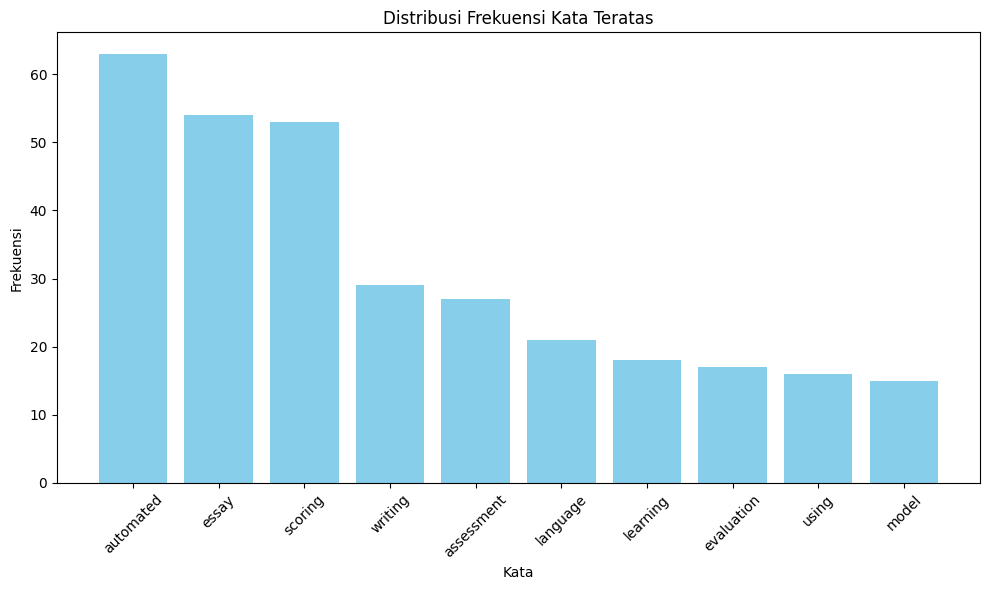

Jumlah total dokumen: 118
Kata paling sering muncul: automated: 63, essay: 54, scoring: 53, writing: 29, assessment: 27
Kata dengan bobot TF-IDF tertinggi: automated: 9.29, scoring: 8.45, essay: 8.34, writing: 5.66, assessment: 5.42


In [ ]:
# Menghitung jumlah total dokumen
total_documents = filtered_data.shape[0]

# Menghitung frekuensi kata
all_tokens = [token for sublist in filtered_data['lemmatized_tokens'] for token in sublist]
word_freq = Counter(all_tokens)

# Menemukan kata paling sering muncul
most_common_words = word_freq.most_common(5)  # 5 kata paling umum
most_common_words_str = ', '.join([f"{word}: {freq}" for word, freq in most_common_words])

# Menghitung total bobot TF-IDF untuk setiap kata
total_tfidf = tfidf_df.sum(axis=0)

# Menemukan kata dengan bobot TF-IDF tertinggi
sorted_tfidf = total_tfidf.sort_values(ascending=False)
top_tfidf_words = sorted_tfidf.head(5)  # 5 kata dengan bobot TF-IDF tertinggi
top_tfidf_words_str = ', '.join([f"{word}: {weight:.2f}" for word, weight in top_tfidf_words.items()])

# Visualisasi distribusi frekuensi kata
top_n_words = word_freq.most_common(10)  # 10 kata teratas
words, freqs = zip(*top_n_words)

plt.figure(figsize=(10, 6))
plt.bar(words, freqs, color='skyblue')
plt.title('Distribusi Frekuensi Kata Teratas')
plt.xlabel('Kata')
plt.ylabel('Frekuensi')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

# Mencetak semua insight
print(f"Jumlah total dokumen: {total_documents}")
print(f"Kata paling sering muncul: {most_common_words_str}")
print(f"Kata dengan bobot TF-IDF tertinggi: {top_tfidf_words_str}")

**Tahap NER / Named Entity Recognition**

In [ ]:
# Memuat model spaCy
nlp = spacy.load("en_core_web_sm")

# Menerapkan NER pada setiap judul dokumen
results = []

for index, row in filtered_data.iterrows():
    doc = nlp(row['lemmatized_text'])  # Menggunakan teks yang telah dilemmatization
    for ent in doc.ents:
        results.append({
            'Title': row['primary_title'],   # Judul dokumen
            'Entity': ent.text,              # Teks entitas
            'Label': ent.label_              # Label entitas
        })

# Membuat DataFrame dari hasil NER
ner_df = pd.DataFrame(results)

# Menampilkan hasil NER
print("\nHasil Named Entity Recognition (NER):")
print(ner_df)


/usr/local/lib/python3.11/dist-packages/spacy/util.py:1740: UserWarning: [W111] Jupyter notebook detected: if using `prefer_gpu()` or `require_gpu()`, include it in the same cell right before `spacy.load()` to ensure that the model is loaded on the correct device. More information: http://spacy.io/usage/v3#jupyter-notebook-gpu
  warnings.warn(Warnings.W111)



Hasil Named Entity Recognition (NER):
                                                Title  \
0   detecting chatgptgenerated essays in a largesc...   
1   large language models and automated essay scor...   
2   a multifaceted architecture to automate essay ...   
3   an enhanced automatic arabic essay scoring sys...   
4   nlp in smes for industry 40 opportunities and ...   
5   msim multilevel semantic inference model for c...   
6   a text gan framework for creative essay recomm...   
7   arascore investigating responsebased arabic sh...   
8   aaee automated evaluation of students essays i...   
9   validity of automated essay scores for element...   
10  using convolutional neural networks to automat...   
11  using convolutional neural networks to automat...   
12  simpa statementtoitem matching personality ass...   
13  towards estimating global probabilities of eva...   
14  elementary english learners engagement with au...   
15  contextualizing automated writing evaluation 